<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/assignment/ass5/hpdp/HANY/feature_eng_tool2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 5: Automated Feature Engineering Tools Assignment

## Objective
In this assignment, we will explore the fascinating world of automated feature engineering tools in data science. Automated feature engineering is an important step that can reduce time while also improving the quality of features used in machine learning models.

Group Members:
<div align="center">

| NAME      | MATRIC NUMBER | TASK |
| :----:      |    :----:   | :----:   |
|   NADIA SYAFIQAH BINTI ZULKIPLI |  A21EC0098        | Tool 2 (Featuretools) |
|LIEW YVONNE      | A21EC0045       | Tool 2 (Featuretools) |
|MUHAMMAD HARITH HAKIM BIN OTHMAN      | A21EC0205       | Tool 1 (Autofeat) |
|  ALYA BALQISS BINTI AZAHAR  |  A21EC0158        | Tool 1 (Autofeat) |



</div>

##1. Dataset Selection
The dataset that we chose can be retrived through this link [Climate Weather Surface of Brazil - Hourly](https://www.kaggle.com/datasets/PROPPG-PPG/hourly-weather-surface-brazil-southeast-region).

## 2. Loading the Dataset

#### Import Libraries

In [ ]:
from  google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nadiasyafiqah","key":"77aa5208ed521d218af610ad2786fb75"}'}

- **'google.colab import files'** - imports the necessary function to upload files in Colab.

- **'files.upload()'** - initiates a file upload dialog box, enabling users to choose and upload files directly into the Colab notebook.

After running the cell with the code above, it will prompt the user to upload files. Navigate to the intended file(s) for upload, select them, and click "Open".

The uploaded files will be stored in the uploaded dictionary, where the keys are the file names and the values are the file contents. Further process or  actions can be performed with these files as needed within the Colab notebook.

#### Uploading Dataset using Kaggle API
 The process involves setting up Kaggle credentials on Google Colab to enable interaction with the Kaggle API for dataset downloads.  This process enables users to access datasets without the need to download them manually, particularly beneficial for handling large datasets.

In [ ]:
!pip install kaggle # 1. Install the Kaggle Package
!mkdir -p ~/.kaggle # 2. Create a Kaggle Directory
!cp kaggle.json ~/.kaggle/ #3. Upload the Kaggle API Token
!chmod 600 ~/.kaggle/kaggle.json #4. Set File Permission

**Download the dataset**

In [ ]:
!kaggle datasets download PROPPG-PPG/hourly-weather-surface-brazil-southeast-region

 99% 1.56G/1.58G [00:12<00:00, 258MB/s]
100% 1.58G/1.58G [00:12<00:00, 140MB/s]


**Unzip the downloaded dataset**

In [ ]:
!unzip hourly-weather-surface-brazil-southeast-region.zip

Archive:  hourly-weather-surface-brazil-southeast-region.zip
  inflating: central_west.csv        
  inflating: columns_description.csv  
  inflating: make_dataset.py         
  inflating: metrics.py              
  inflating: north.csv               
  inflating: northeast.csv           
  inflating: south.csv               
  inflating: stations.csv            


#### Import Libraries and Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
df = pd.read_csv('central_west.csv')

This code reads the CSV file named **central_west.csv** (assuming it is one of the files within the unzipped dataset) into a Pandas DataFrame named df.

#### Data Summary
Display the first few rows of a DataFrame using **df.head()**. This is helpful for quickly examining the structure and content of the dataset. By default, it shows the first 5 rows of the DataFrame.

In [ ]:
df.head()

,index,Data,Hora,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),...,"VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",region,state,station,station_code,latitude,longitude,height
0,138998,2017-12-20,14:00,0.0,899.6,900.0,899.6,3391,26.5,17.7,...,39,9.6,3.9,CO,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
1,138999,2017-12-20,15:00,0.0,899.2,899.6,899.2,3306,26.6,16.7,...,55,8.3,3.4,CO,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
2,139000,2017-12-20,16:00,0.0,898.6,899.2,898.6,3167,27.3,15.8,...,62,8.3,3.6,CO,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
3,139001,2017-12-20,17:00,0.0,897.7,898.6,897.7,3279,27.5,12.9,...,43,6.7,3.1,CO,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
4,139002,2017-12-20,18:00,0.0,897.0,897.7,897.0,2753,27.5,13.7,...,98,6.4,3.5,CO,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11427120 entries, 0 to 11427119
Data columns (total 27 columns):
 #   Column                                                 Dtype  
---  ------                                                 -----  
 0   index                                                  int64  
 1   Data                                                   object 
 2   Hora                                                   object 
 3   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                       float64
 4   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  float64
 5   PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        float64
 6   PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       float64
 7   RADIACAO GLOBAL (Kj/m²)                                int64  
 8   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)           float64
 9   TEMPERATURA DO PONTO DE ORVALHO (°C)                   float64
 10  TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)             float64
 

The **df.info()** function provides a concise summary of the DataFrame's information. It includes details such as the column names, data types, non-null counts, and memory usage. This function helps in understanding the dataset's structure, identifying missing values, and assessing the types of data stored in each column.

#### Number of Rows and Columns
Display the total number of rows and columns to get insights on the data's structure.

In [ ]:
#Find the number of rows and columns
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 11427120
Number of columns: 27




---


### Data Preprocessing



#### Renaming the Columns
Before proceeding with additional data preprocessing steps, it is seen that the dataset chosen **(Climate Weather Surface of Brazil - Hourly)** has several columns in the Portugese language.

It is necessary to translate the dataset from Portuguese to English based on the information available on Kaggle. This translation provides a more comprehensive understanding of the dataset's contents.

In [ ]:
# Mapping the Portugese column names to their English equivalents
translation_dict = {
    'Data': 'Date',
    'Hora': 'Time',
    'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)': 'Amount of Precipitation (mm)',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)': 'Atmospheric Pressure at Station Level (mB)',
    'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)': 'MAX Air pressure for the last hour (mB)',
    'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)': 'MIN Air pressure for the last hour (mB)',
    'RADIACAO GLOBAL (Kj/m²)': 'Solar Radiation (KJ/m2)',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)': 'Air Temperature (instant) (°C)',
    'TEMPERATURA DO PONTO DE ORVALHO (°C)': 'Dew Point Temperature (instant) (°C)',
    'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)': 'MAX Temperature for the last hour (°C)',
    'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)': 'MIN Temperature for the last hour (°C)',
    'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)': 'MAX Dew Point Temperature for the last hour (°C)',
    'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)': 'MIN Dew Point Temperature for the last hour (°C)',
    'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)': 'MAX Relative Humid Temperature for the last hour (%)',
    'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)': 'MIN Relative Humid Temperature for the last hour (%)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)': 'Relative Humid (instant) (%)',
    'VENTO, DIREÇÃO HORARIA (gr) (° (gr))': 'Wind Direction (gr) (° (gr))',
    'VENTO, RAJADA MAXIMA (m/s)': 'Wind Gust (m/s)',
    'VENTO, VELOCIDADE HORARIA (m/s)': 'Wind Speed (m/s)'
}

# Renaming columns in the DataFrame
df.rename(columns=translation_dict, inplace=True)

To see the changes, display the dataset using df.columns().

In [ ]:
df.columns

Index(['index', 'Date', 'Time', 'Amount of Precipitation (mm)',
       'Atmospheric Pressure at Station Level (mB)',
       'MAX Air pressure for the last hour (mB)',
       'MIN Air pressure for the last hour (mB)', 'Solar Radiation (KJ/m2)',
       'Air Temperature (instant) (°C)',
       'Dew Point Temperature (instant) (°C)',
       'MAX Temperature for the last hour (°C)',
       'MIN Temperature for the last hour (°C)',
       'MAX Dew Point Temperature for the last hour (°C)',
       'MIN Dew Point Temperature for the last hour (°C)',
       'MAX Relative Humid Temperature for the last hour (%)',
       'MIN Relative Humid Temperature for the last hour (%)',
       'Relative Humid (instant) (%)', 'Wind Direction (gr) (° (gr))',
       'Wind Gust (m/s)', 'Wind Speed (m/s)', 'region', 'state', 'station',
       'station_code', 'latitude', 'longitude', 'height'],
      dtype='object')

#### Replacing Negative Values
Given that the dataset contains negative values of 9999 (-9999) within specific columns related to weather parameters, it's imperative to replace these negative values with zeros. This decision stems from the understanding that certain weather-related measurements, such as temperature, humidity, or atmospheric pressure, should not logically have such negative values within the context of this dataset.

In [ ]:
# Replace all occurrences of -9999 with 0 in the entire DataFrame
df.replace(-9999, 0, inplace=True)

- This code snippet replaces all instances of -9999 with 0 throughout the DataFrame, effectively transforming negative placeholder values to zeros.

- The negative values in these columns might signify missing data, erroneous entries, or placeholders that were inaccurately represented as negative values.

#### Handling Missing Values

In [ ]:
#Handle missing values
df = df.dropna()

This step ensures that any rows containing NaN (missing) values across any column are removed from the DataFrame. It helps in cleaning the data by eliminating rows with incomplete information.

#### Convert Data Types

In [ ]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Convert 'Hour' column to datetime format
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time

# Display the updated data types of 'Date' and 'Hour' columns
print("Updated Data Types:")
print(df.dtypes)

Updated Data Types:
index                                                            int64
Date                                                    datetime64[ns]
Time                                                            object
Amount of Precipitation (mm)                                   float64
Atmospheric Pressure at Station Level (mB)                     float64
MAX Air pressure for the last hour (mB)                        float64
MIN Air pressure for the last hour (mB)                        float64
Solar Radiation (KJ/m2)                                          int64
Air Temperature (instant) (°C)                                 float64
Dew Point Temperature (instant) (°C)                           float64
MAX Temperature for the last hour (°C)                         float64
MIN Temperature for the last hour (°C)                         float64
MAX Dew Point Temperature for the last hour (°C)               float64
MIN Dew Point Temperature for the last hour (°C)         

- Converting 'Date' and 'Time' columns to datetime format ensures uniformity in data representation. It prevents inconsistencies that might arise from different formats or interpretations of dates and times.

- Datetime objects also allow for easy extraction of components like day, month, year, hour, minute, etc. This makes it simpler to perform time-based operations, filtering, grouping, and aggregating data based on temporal criteria.

## 3. Exploratory Data Analysis (EDA)

**1. Sum of all numeric columns**



In [ ]:
#Sum all numeric columns
sum = df.sum(numeric_only=True)
sum

index                                                   2.011775e+12
Amount of Precipitation (mm)                            1.488907e+06
Atmospheric Pressure at Station Level (mB)              9.434898e+09
MAX Air pressure for the last hour (mB)                 9.433359e+09
MIN Air pressure for the last hour (mB)                 9.426565e+09
Solar Radiation (KJ/m2)                                 8.294114e+09
Air Temperature (instant) (°C)                          2.404545e+08
Dew Point Temperature (instant) (°C)                    1.672062e+08
MAX Temperature for the last hour (°C)                  2.474457e+08
MIN Temperature for the last hour (°C)                  2.333363e+08
MAX Dew Point Temperature for the last hour (°C)        1.727853e+08
MIN Dew Point Temperature for the last hour (°C)        1.616953e+08
MAX Relative Humid Temperature for the last hour (%)    7.031402e+08
MIN Relative Humid Temperature for the last hour (%)    6.426778e+08
Relative Humid (instant) (%)      

**2. Mean of all numeric columns**

In [ ]:
#Mean of all numeric columns
mean = df.mean(numeric_only=True)
mean

index                                                   176052.691065
Amount of Precipitation (mm)                                 0.130296
Atmospheric Pressure at Station Level (mB)                 825.658446
MAX Air pressure for the last hour (mB)                    825.523753
MIN Air pressure for the last hour (mB)                    824.929211
Solar Radiation (KJ/m2)                                    725.827197
Air Temperature (instant) (°C)                              21.042438
Dew Point Temperature (instant) (°C)                        14.632399
MAX Temperature for the last hour (°C)                      21.654247
MIN Temperature for the last hour (°C)                      20.419520
MAX Dew Point Temperature for the last hour (°C)            15.120634
MIN Dew Point Temperature for the last hour (°C)            14.150132
MAX Relative Humid Temperature for the last hour (%)        61.532584
MIN Relative Humid Temperature for the last hour (%)        56.241449
Relative Humid (inst

**3. Minimum values of all numeric columns**

In [ ]:
#Minimum values of all numeric columns
min_values = df.min(numeric_only=True)
min_values

index                                                    0.000000
Amount of Precipitation (mm)                             0.000000
Atmospheric Pressure at Station Level (mB)               0.000000
MAX Air pressure for the last hour (mB)                  0.000000
MIN Air pressure for the last hour (mB)                  0.000000
Solar Radiation (KJ/m2)                                  0.000000
Air Temperature (instant) (°C)                          -9.800000
Dew Point Temperature (instant) (°C)                   -10.000000
MAX Temperature for the last hour (°C)                  -9.700000
MIN Temperature for the last hour (°C)                  -9.700000
MAX Dew Point Temperature for the last hour (°C)       -10.000000
MIN Dew Point Temperature for the last hour (°C)       -10.000000
MAX Relative Humid Temperature for the last hour (%)     0.000000
MIN Relative Humid Temperature for the last hour (%)     0.000000
Relative Humid (instant) (%)                             0.000000
Wind Direc

**4. Maximum values of all numeric columns**

In [ ]:
#Maximum values of all numeric columns
max_values = df.max(numeric_only=True)
max_values

index                                                   419935.000000
Amount of Precipitation (mm)                                96.000000
Atmospheric Pressure at Station Level (mB)                1028.800000
MAX Air pressure for the last hour (mB)                   1030.600000
MIN Air pressure for the last hour (mB)                   1028.100000
Solar Radiation (KJ/m2)                                  48898.000000
Air Temperature (instant) (°C)                              45.000000
Dew Point Temperature (instant) (°C)                        44.800000
MAX Temperature for the last hour (°C)                      45.000000
MIN Temperature for the last hour (°C)                      45.000000
MAX Dew Point Temperature for the last hour (°C)            44.900000
MIN Dew Point Temperature for the last hour (°C)            44.700000
MAX Relative Humid Temperature for the last hour (%)       100.000000
MIN Relative Humid Temperature for the last hour (%)       100.000000
Relative Humid (inst

**5. Median of all numeric columns**

In [ ]:
#Median of all numeric columns
median_values = df.median(numeric_only=True)
median_values

index                                                   166159.000000
Amount of Precipitation (mm)                                 0.000000
Atmospheric Pressure at Station Level (mB)                 955.300000
MAX Air pressure for the last hour (mB)                    955.500000
MIN Air pressure for the last hour (mB)                    954.900000
Solar Radiation (KJ/m2)                                      0.000000
Air Temperature (instant) (°C)                              22.900000
Dew Point Temperature (instant) (°C)                        17.300000
MAX Temperature for the last hour (°C)                      23.500000
MIN Temperature for the last hour (°C)                      22.400000
MAX Dew Point Temperature for the last hour (°C)            17.900000
MIN Dew Point Temperature for the last hour (°C)            16.800000
MAX Relative Humid Temperature for the last hour (%)        71.000000
MIN Relative Humid Temperature for the last hour (%)        62.000000
Relative Humid (inst

**6. First quantile (25th percentile) of all numeric columns**

In [ ]:
#First quantile of all numeric values
q1 = df.quantile(0.25, numeric_only=True)
q1

index                                                   79103.000000
Amount of Precipitation (mm)                                0.000000
Atmospheric Pressure at Station Level (mB)                923.300000
MAX Air pressure for the last hour (mB)                   923.400000
MIN Air pressure for the last hour (mB)                   922.800000
Solar Radiation (KJ/m2)                                     0.000000
Air Temperature (instant) (°C)                             19.200000
Dew Point Temperature (instant) (°C)                       10.600000
MAX Temperature for the last hour (°C)                     19.700000
MIN Temperature for the last hour (°C)                     18.600000
MAX Dew Point Temperature for the last hour (°C)           11.300000
MIN Dew Point Temperature for the last hour (°C)           10.000000
MAX Relative Humid Temperature for the last hour (%)       44.000000
MIN Relative Humid Temperature for the last hour (%)       36.000000
Relative Humid (instant) (%)      

**7. Third quantile (75th percentile) of all numeric columns**

In [ ]:
#Third quantile of all numeric values
q3 = df.quantile(0.75, numeric_only=True)
q3

index                                                   265705.000000
Amount of Precipitation (mm)                                 0.000000
Atmospheric Pressure at Station Level (mB)                 974.100000
MAX Air pressure for the last hour (mB)                    974.400000
MIN Air pressure for the last hour (mB)                    973.800000
Solar Radiation (KJ/m2)                                   1124.000000
Air Temperature (instant) (°C)                              26.900000
Dew Point Temperature (instant) (°C)                        20.500000
MAX Temperature for the last hour (°C)                      27.800000
MIN Temperature for the last hour (°C)                      26.000000
MAX Dew Point Temperature for the last hour (°C)            21.000000
MIN Dew Point Temperature for the last hour (°C)            20.000000
MAX Relative Humid Temperature for the last hour (%)        88.000000
MIN Relative Humid Temperature for the last hour (%)        83.000000
Relative Humid (inst

##4. Feature Engineering with Automated Tools

###Automated Tool 1 - Featuretools

The first Automated Tool is Featuretools. Featuretools is a Python library that automates the crucial step of feature engineering in machine learning. It efficiently generates meaningful features from data, saving time and enhancing predictive modeling tasks by using deep feature synthesis.

i. Install the latest version of Featuretools library into Google Colab.

In [ ]:
!pip install -U featuretools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.2/619.2 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 754.4/754.4 kB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.0/236.0 kB 19.6 MB/s eta 0:00:00
  Attempting uninstall: holidays
    Found existing installation: holidays 0.36
    Uninstalling holidays-0.36:
      Successfully uninstalled holidays-0.36


ii. Import the installed Featuretools and ignore the warning messages from pandas.

In [ ]:
import featuretools as ft

import warnings
warnings.filterwarnings('ignore')

iii. Create a new EntitySet with the id 'weather' for future defining relationships and adding dataframe.

In [ ]:
es = ft.EntitySet(id='weather')

iv. Create a new DataFrame 'state' with unique values from parent entity set 'state'.

In [ ]:
state = pd.DataFrame(df.state.unique(), columns = ["state"])

v. Create an entity from the df dataframe.

In [ ]:
df = df.drop_duplicates(subset=['index'], keep='first')

es = es.add_dataframe(     dataframe=df,
                           dataframe_name="main",
                           index="index"
)

vi. Add another Dataframe 'state' to the es defined previously.

In [ ]:
es = es.add_dataframe(
                         dataframe = state,
                         dataframe_name = "state"
)

vii. Create relationship between 'state' entity and 'weather' entity in the es. 'state' is the parent entity while 'weather' is the child entity.

In [ ]:
es.add_relationship("state", "state", "main", "state")

Entityset: weather
  DataFrames:
    main [Rows: 419936, Columns: 28]
    state [Rows: 4, Columns: 1]
  Relationships:
    main.state -> state.state

viii. Perform deep feature synthesis from Featuretools library without specifying primitives.

In [ ]:
features, feature_names = ft.dfs(entityset=es, target_dataframe_name='main', agg_primitives=['mean', 'sum', 'mode', 'max', 'count'], max_depth = 2)

* First 5 rows of the new features.

In [ ]:
features.head()

,Amount of Precipitation (mm),Atmospheric Pressure at Station Level (mB),MAX Air pressure for the last hour (mB),MIN Air pressure for the last hour (mB),Solar Radiation (KJ/m2),Air Temperature (instant) (°C),Dew Point Temperature (instant) (°C),MAX Temperature for the last hour (°C),MIN Temperature for the last hour (°C),MAX Dew Point Temperature for the last hour (°C),...,state.SUM(main.MIN Relative Humid Temperature for the last hour (%)),state.SUM(main.MIN Temperature for the last hour (°C)),state.SUM(main.Relative Humid (instant) (%)),state.SUM(main.Solar Radiation (KJ/m2)),state.SUM(main.Wind Direction (gr) (° (gr))),state.SUM(main.Wind Gust (m/s)),state.SUM(main.Wind Speed (m/s)),state.SUM(main.height),state.SUM(main.latitude),state.SUM(main.longitude)
index,,,,,,,,,,,,,,,,,,,,,
138998,0.0,899.6,900.0,899.6,3391,26.5,17.7,26.5,24.4,18.3,...,704153.0,244906.7,743578.0,9420848.0,1807777.0,61354.2,26926.7,12306182.0,-187494.002685,-567591.329875
138999,0.0,899.2,899.6,899.2,3306,26.6,16.7,26.7,25.4,17.9,...,704153.0,244906.7,743578.0,9420848.0,1807777.0,61354.2,26926.7,12306182.0,-187494.002685,-567591.329875
139000,0.0,898.6,899.2,898.6,3167,27.3,15.8,27.6,25.9,17.1,...,704153.0,244906.7,743578.0,9420848.0,1807777.0,61354.2,26926.7,12306182.0,-187494.002685,-567591.329875
139001,0.0,897.7,898.6,897.7,3279,27.5,12.9,28.5,26.6,17.6,...,704153.0,244906.7,743578.0,9420848.0,1807777.0,61354.2,26926.7,12306182.0,-187494.002685,-567591.329875
139002,0.0,897.0,897.7,897.0,2753,27.5,13.7,28.9,27.4,15.6,...,704153.0,244906.7,743578.0,9420848.0,1807777.0,61354.2,26926.7,12306182.0,-187494.002685,-567591.329875


* Columns of the new features

In [ ]:
features.columns

Index(['Amount of Precipitation (mm)',
       'Atmospheric Pressure at Station Level (mB)',
       'MAX Air pressure for the last hour (mB)',
       'MIN Air pressure for the last hour (mB)', 'Solar Radiation (KJ/m2)',
       'Air Temperature (instant) (°C)',
       'Dew Point Temperature (instant) (°C)',
       'MAX Temperature for the last hour (°C)',
       'MIN Temperature for the last hour (°C)',
       'MAX Dew Point Temperature for the last hour (°C)',
       'MIN Dew Point Temperature for the last hour (°C)',
       'MAX Relative Humid Temperature for the last hour (%)',
       'MIN Relative Humid Temperature for the last hour (%)',
       'Relative Humid (instant) (%)', 'Wind Direction (gr) (° (gr))',
       'Wind Gust (m/s)', 'Wind Speed (m/s)', 'region', 'station',
       'station_code', 'latitude', 'longitude', 'height', 'DAY(Date)',
       'DAY(Hour)', 'DAY(Time)', 'MONTH(Date)', 'MONTH(Hour)', 'MONTH(Time)',
       'WEEKDAY(Date)', 'WEEKDAY(Hour)', 'WEEKDAY(Time)', 'YEAR(

##5. Feature Selection

Use mutual information (MI) scores to perform features selection.

* **make_mi_scores** function calculates MI scores for each feature using mutual information regression from scikit-learn.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
plt.style.use("seaborn-whitegrid")

In [ ]:
features.dropna(axis=1, inplace=True)

In [ ]:
X = features.copy()
y = X.pop('Air Temperature (instant) (°C)')

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
for colname in X.select_dtypes("category"):
    X[colname], _ = X[colname].factorize()
# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int


In [ ]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

MIN Temperature for the last hour (°C)                                  2.580900
Dew Point Temperature (instant) (°C)                                    0.536520
MIN Relative Humid Temperature for the last hour (%)                    0.498986
Atmospheric Pressure at Station Level (mB)                              0.372847
Wind Direction (gr) (° (gr))                                            0.308054
height                                                                  0.198620
station_code                                                            0.196360
state.MAX(main.height)                                                  0.044624
state.MEAN(main.Atmospheric Pressure at Station Level (mB))             0.043194
state.MAX(main.latitude)                                                0.042769
state.SUM(main.Dew Point Temperature (instant) (°C))                    0.042559
state.MEAN(main.MIN Air pressure for the last hour (mB))                0.042361
state.MAX(main.Air Temperatu

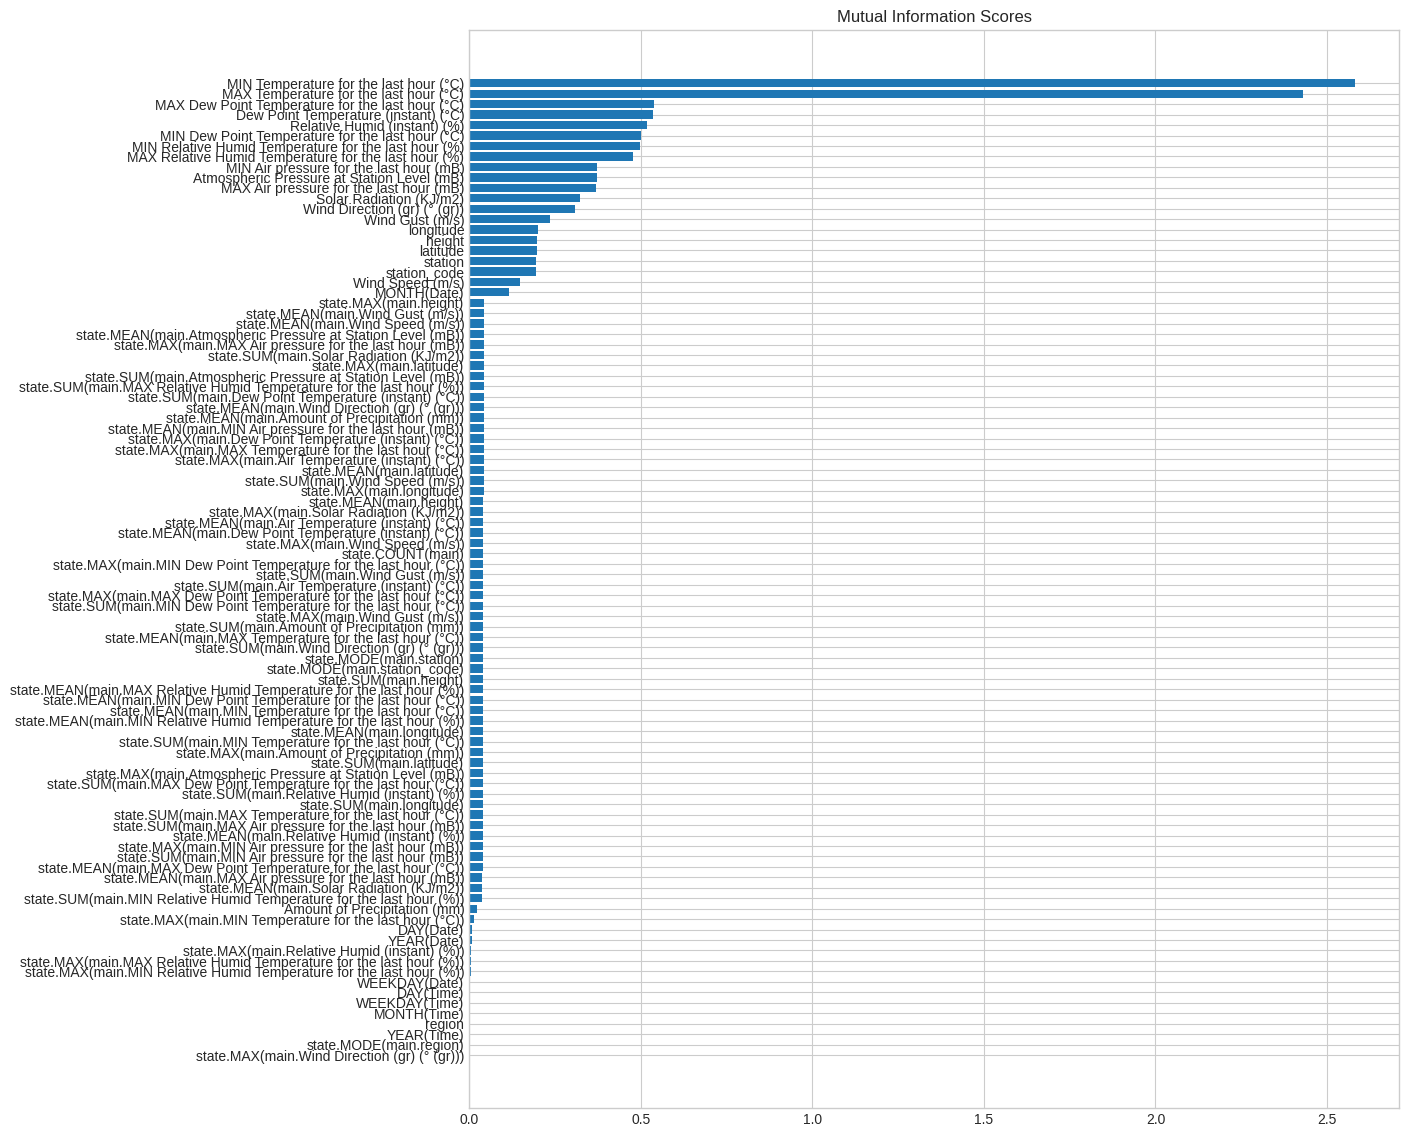

In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(12, 14))
plot_mi_scores(mi_scores)

From the columns shown above, we can determine the new features that is useful for understanding and analysis of this dataset.

##6. Visualization

###Scatter Plot
This scatter plot represent the top 5 features with the highest mutual information scores against target variable.

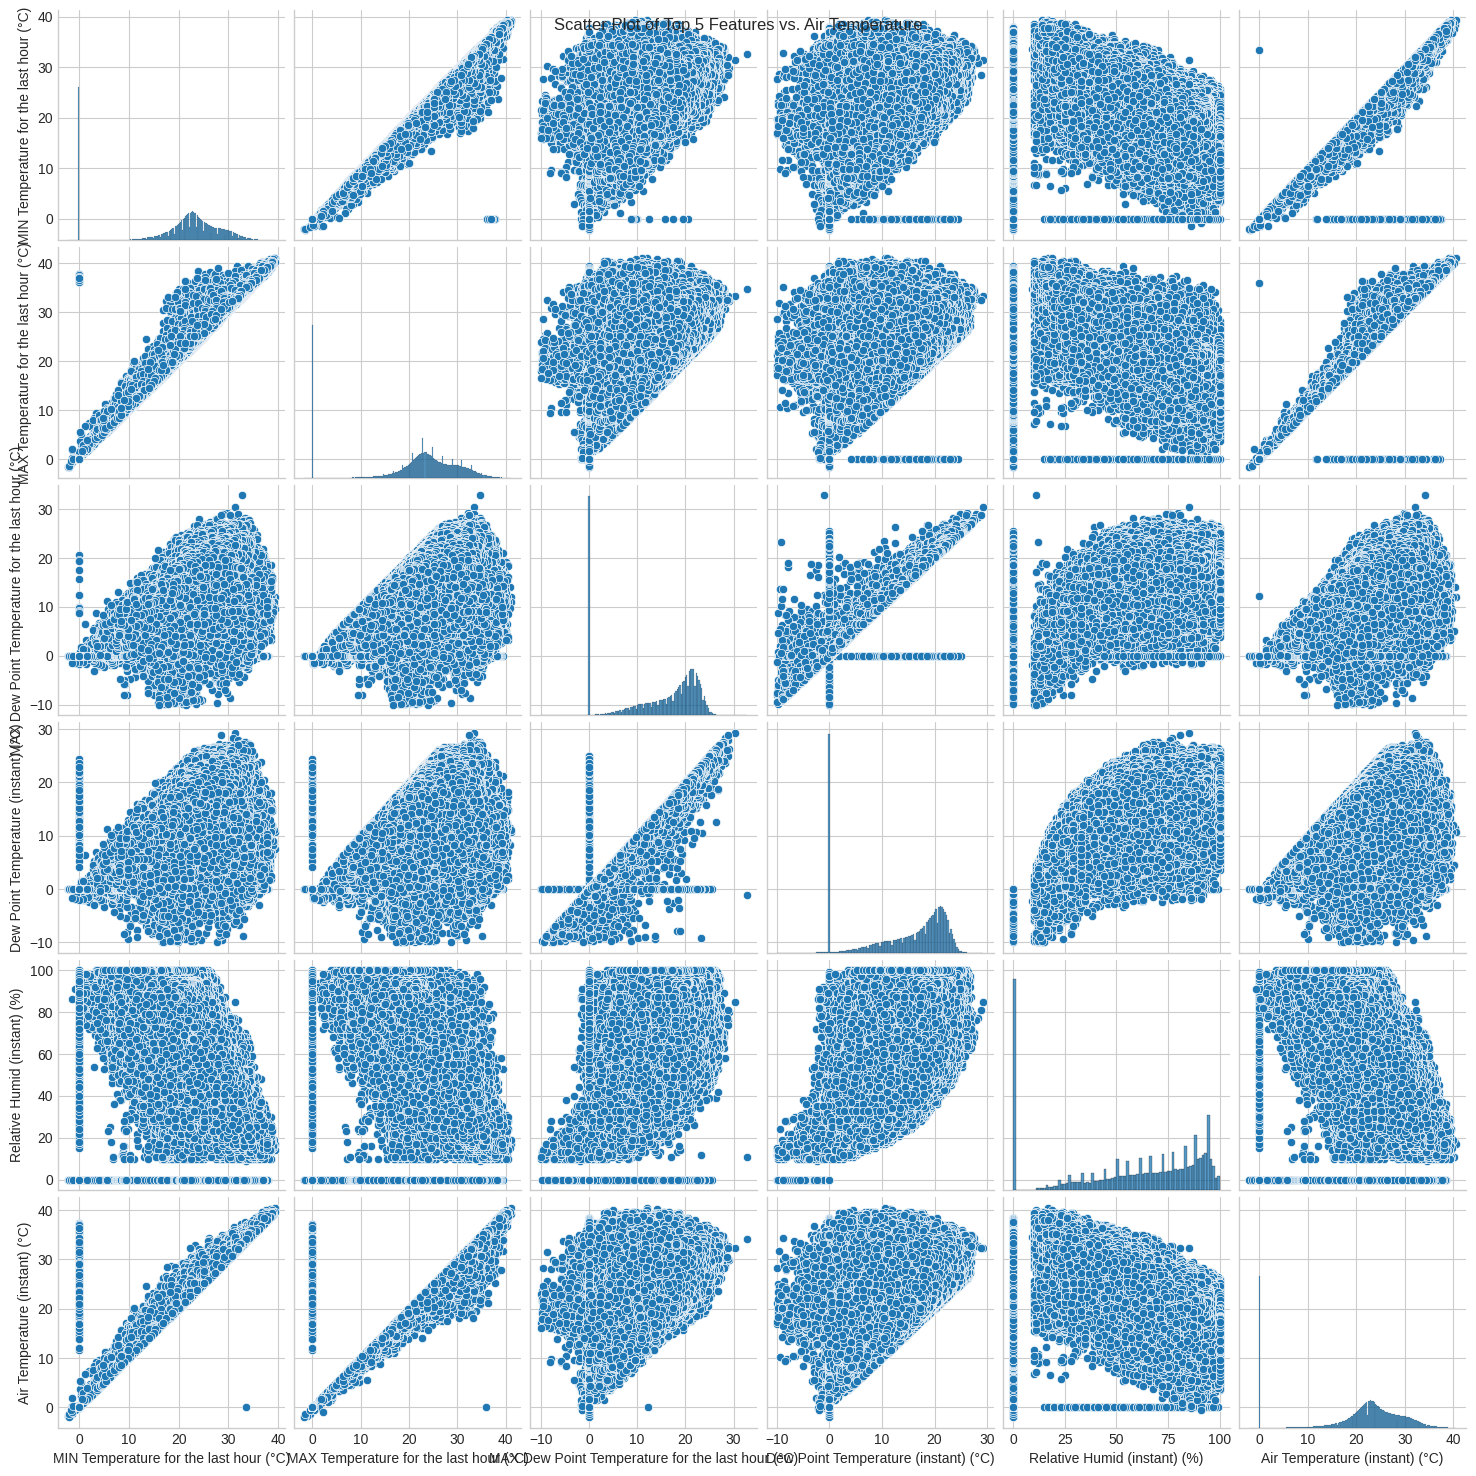

In [ ]:
top_n = 5  # Number of top features to visualize
top_features = mi_scores.head(top_n).index.tolist()
sns.pairplot(pd.concat([X[top_features], y], axis=1), kind='scatter')
plt.suptitle(f'Scatter Plot of Top {top_n} Features vs. Air Temperature')
plt.show()

###Box Plot for Top Features
Using box plots to compare the distribution of the target variable within different categories/values of the top features.

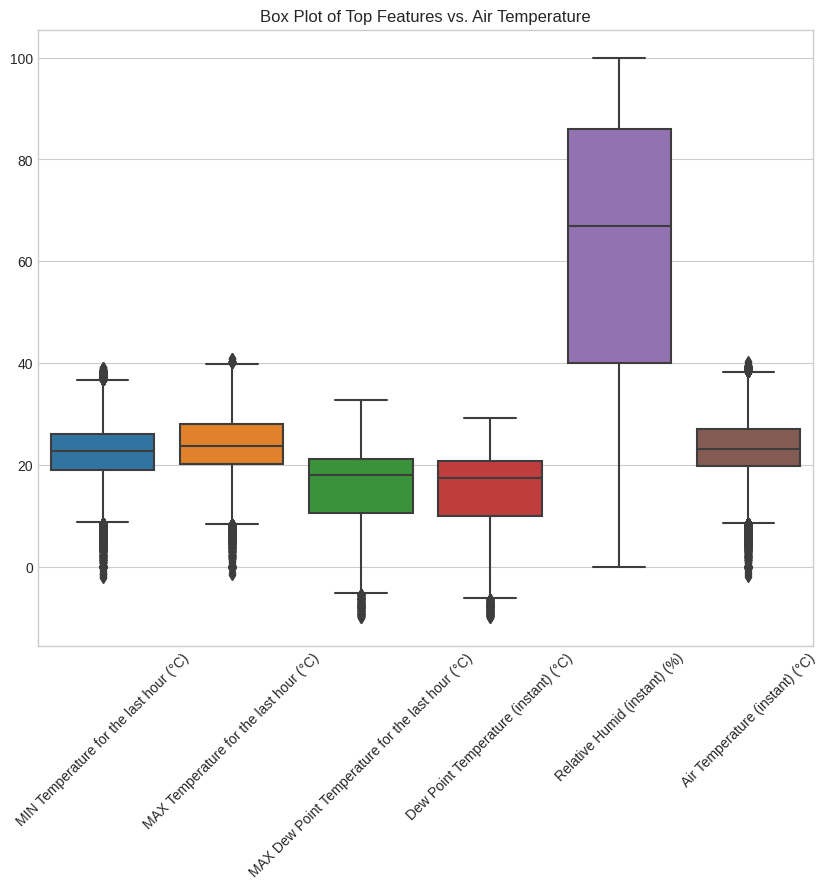

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=pd.concat([X[top_features], y], axis=1))
plt.xticks(rotation=45)
plt.title('Box Plot of Top Features vs. Air Temperature')
plt.show()

###Heat Map
The heat map below represent the correlation between the top features and the target variable.

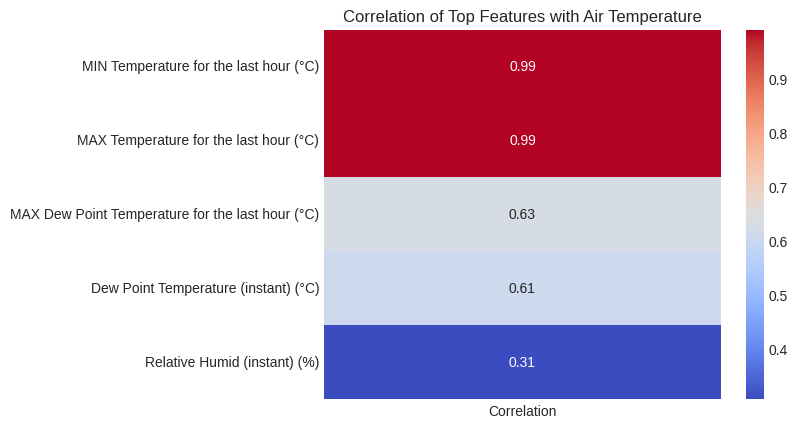

In [ ]:
top_corr_features = X[top_features].corrwith(y)
sns.heatmap(pd.DataFrame(top_corr_features, columns=['Correlation']), annot=True, cmap='coolwarm')
plt.title('Correlation of Top Features with Air Temperature')
plt.show()

###Bar Chart


This Bar Chart shows the total amount of precipitation (mm) according to states.

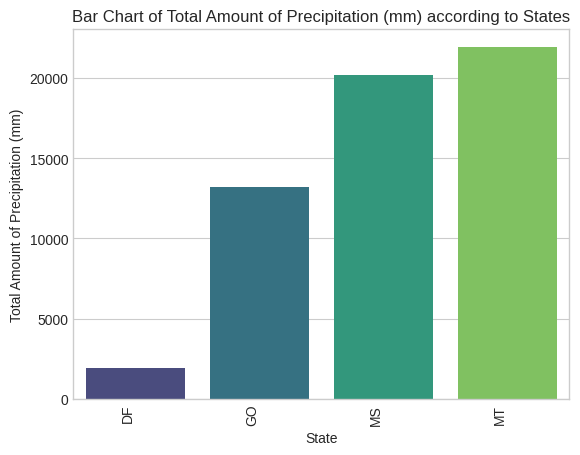

In [ ]:
precipitation_state = df.groupby('state')['Amount of Precipitation (mm)'].agg('sum')

sns.barplot(x= precipitation_state.index, y=precipitation_state, palette='viridis')
plt.xticks(rotation=90, ha='right')
plt.xlabel('State')
plt.ylabel('Total Amount of Precipitation (mm)')
plt.title('Bar Chart of Total Amount of Precipitation (mm) according to States')
plt.show()

This Bar Chart shows the maximum air temperature in different states.

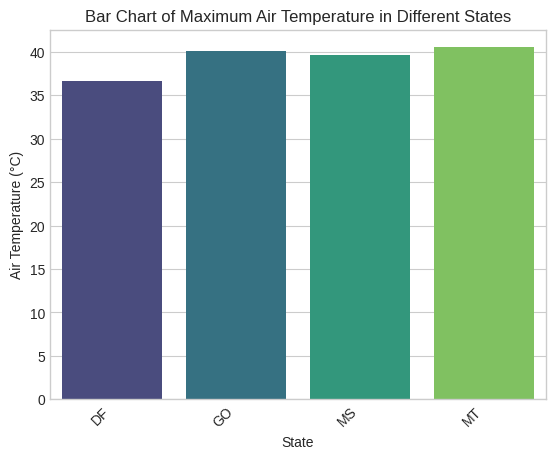

In [ ]:
temperature_state = df.groupby('state')['Air Temperature (instant) (°C)'].agg('max')

sns.barplot(x= temperature_state.index, y=temperature_state, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('State')
plt.ylabel('Air Temperature (°C)')
plt.title('Bar Chart of Maximum Air Temperature in Different States')
plt.show()

This Bar Chart shows the atmospheric pressure at station level (mB) in different states

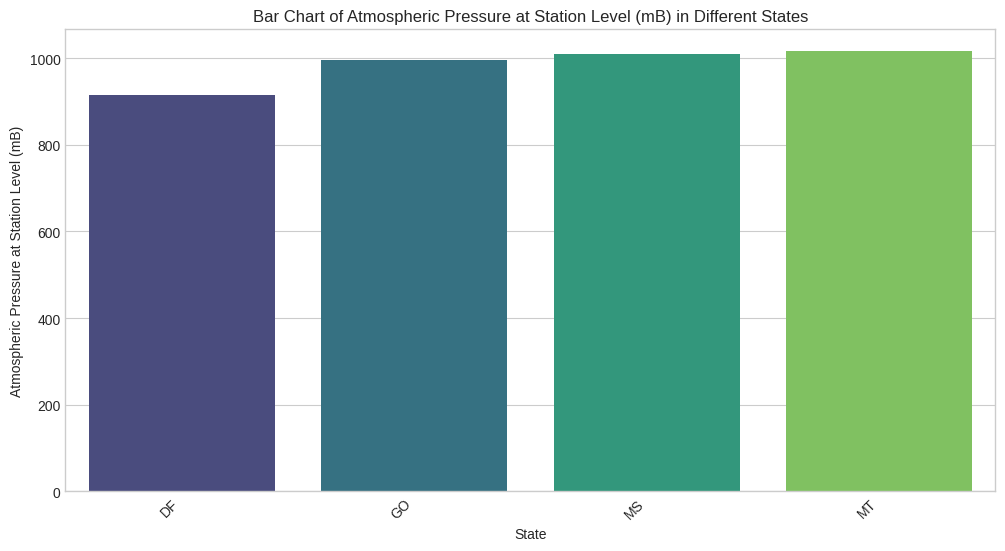

In [ ]:
atmosphere_state = df.groupby('state')['Atmospheric Pressure at Station Level (mB)'].agg('max')

plt.figure(figsize=(12, 6))
sns.barplot(x = atmosphere_state.index, y= atmosphere_state.values,  palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('State')
plt.ylabel('Atmospheric Pressure at Station Level (mB)')
plt.title('Bar Chart of Atmospheric Pressure at Station Level (mB) in Different States')
plt.show()

##7. Conclusion

Initially, data preprocessing was crucial to ensure data integrity. This involved renaming columns for better readability, replacing missing values with zeros, handling duplicates, converting date and time columns to the appropriate data types, and conducting a comprehensive statistical summary of the numeric variables. The cleaning process facilitated a more accurate and structured dataset for subsequent analysis.

Featuretools, a powerful tool for automated feature engineering, was leveraged to generate additional features and relationships within the data. Utilizing an EntitySet that incorporated 'weather' and 'state' dataframes, relationships were established, and features were derived using Deep Feature Synthesis (DFS). This step contributed to enriching the dataset with new variables derived from existing ones, potentially capturing complex patterns within the data.

Furthermore, the analysis included feature selection using mutual information scores. These scores indicated the relative importance of each feature concerning predicting the 'Air Temperature (instant) (°C)'. By utilizing mutual information, we gained insights into which variables were most informative for predicting the target temperature, aiding in potential feature prioritization or model building.